# 順位相関指数(RCI)のデモ

## 分析環境の構築

In [1]:
import yfinance as yf
from datetime import datetime, timedelta
from datetime import date
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import mplfinance as mpf

## 銘柄とデータ開始時期を指定して株価データを取得する

In [2]:
ticker = '4755.T' # 4755は楽天
end = datetime.today()
start = end - timedelta(days=182)  # 6 months before today
yf.pdr_override()
# yahooサイトからデータをダウンロード
df = pdr.get_data_yahoo(ticker, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-07,833.000000,861.000000,823.099976,838.599976,838.599976,40329400
2024-03-08,840.000000,850.000000,819.200012,825.400024,825.400024,23099400
2024-03-11,815.000000,835.400024,815.000000,826.900024,826.900024,20663400
2024-03-12,818.599976,825.900024,791.400024,818.299988,818.299988,30194800
2024-03-13,819.700012,826.200012,809.799988,821.299988,821.299988,10297500


## 順位相関指数 (RCI) 

In [4]:
# subplotとして順位相関指数(RCI)を描画する
# 各種指標の計算関数
def rci(close, timeperiod=9):
    rci = np.full_like(close, np.nan)
    rank_period = np.arange(1, timeperiod + 1)
    for i in range(timeperiod - 1, len(close)):
        rank_price = close[i - timeperiod + 1:i + 1]
        rank_price = np.argsort(np.argsort(rank_price)) + 1
        aa = 6 * sum((rank_period - rank_price)**2)
        bb = timeperiod * (timeperiod**2 - 1)
        rci[i] = (1 - aa / bb) * 100
    return rci
# 指標計算関数を実行して結果をリストに格納する
osc_rci = rci(df['Close'])
# 追加プロットのリストを作成する
osc_plot1 = [
    mpf.make_addplot((osc_rci), panel=2, ylabel='RCI', secondary_y=False)
]

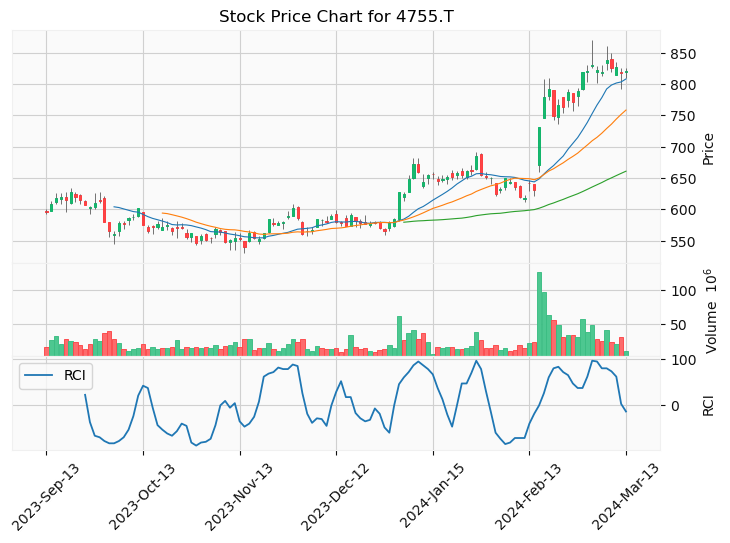

In [5]:
# 表題と凡例
ch_title = 'Stock Price Chart for ' + ticker
line_titles = ['RCI']
# チャート描画：指定可能なtypeは'ohlc'(default), 'candle', 'line', 'renko', 'pnf'
fig, axes = mpf.plot(df,type='candle',figsize =(9,6), style='yahoo',
         addplot=osc_plot1,volume=True,mav=(15,25,75), returnfig=True)
# 表題と凡例の指定
axes[0].set_title(ch_title)
axes[4].legend(line_titles)